<a href="https://colab.research.google.com/github/devmj092/customer-churn/blob/main/Customer_Churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Logistic Regression**

Some regression algorithms can be used for classification as well (and vice versa). Logistic Regression (also called Logit Regression) is commonly used to estimate the probability that an instance belongs to a particular class
(e.g., what is the probability that this email is spam?). If the estimated probability is
greater than 50%, then the model predicts that the instance belongs to that class
(called the positive class, labeled “1”), or else it predicts that it does not (i.e., it
belongs to the negative class, labeled “0”). This makes it a binary classifier.

**Estimating Probabilities**

So how does it work? Just like a Linear Regression model, a Logistic Regression
model computes a weighted sum of the input features (plus a bias term), but instead
of outputting the result directly like the Linear Regression model does, it outputs the logistic of this result.



Logistic Regression model estimated probability (vectorized form)


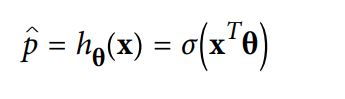

where:

X is a matrix of input features, where each row represents a data point and each column represents a feature.
θ is a column vector of parameters.
σ is applied element-wise to the matrix product.

The logistic—noted σ(·)—is a sigmoid function (i.e., S-shaped) that outputs a number
between 0 and 1. It is defined as:

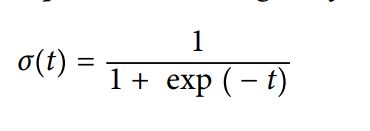

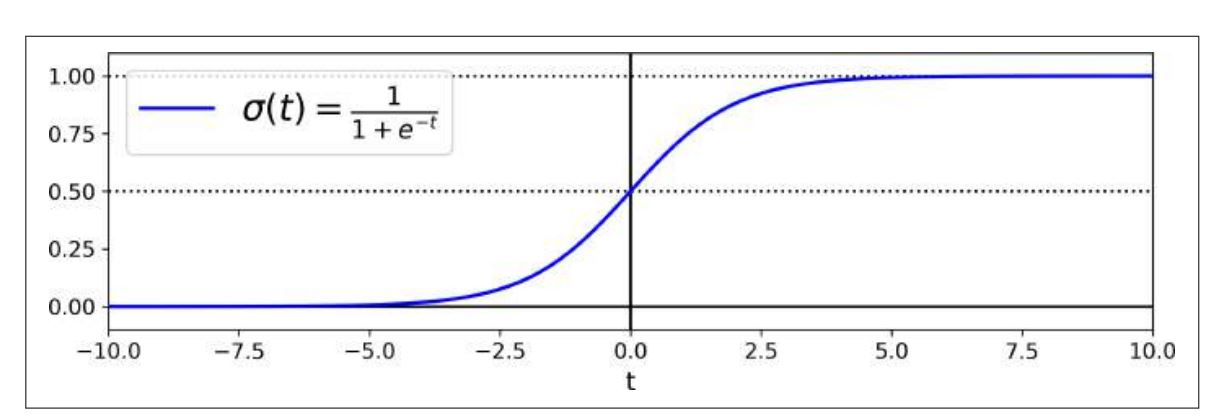

Once the Logistic Regression model has estimated the probability p = hθ
(x) that an
instance x belongs to the positive class, it can make its prediction ŷ easily:

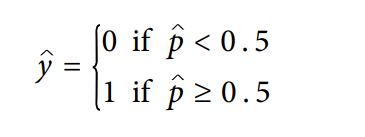

Notice that σ(t) < 0.5 when t < 0, and σ(t) ≥ 0.5 when t ≥ 0, so a Logistic Regression
model predicts 1 if (X^T * θ) is positive, and 0 if it is negative.

## **Problem Satement:** Predict behavior to retain customers



#Import libraries & load dataset

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
from google.colab import drive
drive. mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
path = "/content/drive/MyDrive/GenEd/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(path, encoding='latin-1')

In [ ]:
df.head(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Churn Definition:** In this dataset, the Churn column indicates whether a customer has canceled their service (Yes) or is still active (No). So, churn is defined as customers who have left the company's services.

**Industry:** Telecommunications.

**Business Impact:** High churn rates can significantly impact revenue, making it crucial for telecom companies to predict and mitigate churn.

so **lowering churn** has a big positive impact on revenue streams

#EDA

In [ ]:
df.shape

(7043, 21)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


**Data Types:** The majority of columns (18) are of type object, suggesting they likely contain categorical or textual data. The remaining columns (SeniorCitizen, tenure) are int type while (MonthlyCharges) is float type.

In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
#Describe the column with object type
df.select_dtypes(include=['object']).describe().T

,count,unique,top,freq
customerID,7043,7043,7590-VHVEG,1
gender,7043,2,Male,3555
Partner,7043,2,No,3641
Dependents,7043,2,No,4933
PhoneService,7043,2,Yes,6361
MultipleLines,7043,3,No,3390
InternetService,7043,3,Fiber optic,3096
OnlineSecurity,7043,3,No,3498
OnlineBackup,7043,3,No,3088
DeviceProtection,7043,3,No,3095


In [ ]:
df.Churn.value_counts()

,count
Churn,
No,5174
Yes,1869


So from the table we can see our predicted variable has 2 unique values i.e yes and no

---



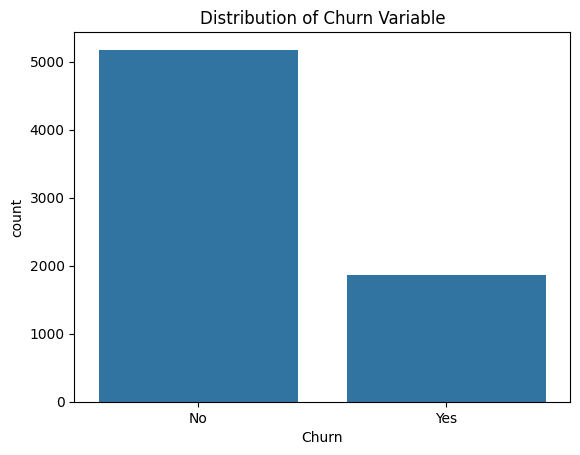

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of the target variable
sns.countplot(x='Churn', data=df)
plt.title('Distribution of Churn Variable')
plt.show()

In [ ]:
# missing values
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


###Hence there are no missing values in our dataset

In [ ]:
# Drop unnecessary columns (e.g., 'customerID')
df.drop('customerID', axis=1, inplace=True)

In [ ]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


As you can see **customerID** column has been removed.

#Model Building

In [ ]:
# Import the LabelEncoder class
from sklearn.preprocessing import LabelEncoder

# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])
# Split the dataset into features and target variable
X = df.drop('Churn', axis=1)
y = df['Churn']

In [ ]:
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,925


In [ ]:
y.head()

,Churn
0,0
1,0
2,1
3,0
4,1


So the data is transformed from categorical to numerical data

In [ ]:
y.value_counts()

,count
Churn,
0,5174
1,1869


0=NO

1=Yes

In [ ]:
# Scaling data

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)



Accuracy: 0.8161816891412349


X: In our case i.e customer churn, each row of X represents a customer. Each column represents a feature that might influence churn, such as customer tenure	PhoneService	MultipleLines	and InternetService.
θ: This is a vector of parameters that the model learns during training. These parameters determine the importance of each feature in predicting churn.
σ: The sigmoid function maps the output of θ^T X to a probability between 0 and 1. A probability closer to 1 indicates a higher likelihood of churn, while a probability closer to 0 suggests a lower likelihood.

In [ ]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.56      0.62       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409



**Interpretation of Precision, Recall, and F1-score:**

**Precision for Class 0:** 85% of the samples predicted as class 0 were indeed class 0.

**Recall for Class 0:** 91% of the actual class 0 samples were correctly predicted.

**F1-score for Class 0:** 88% balances precision and recall for class 0.

**Precision for Class 1:** 69% of the samples predicted as class 1 were indeed class 1.

**Recall for Class 1:** 56% of the actual class 1 samples were correctly predicted.

**F1-score for Class 1:** 62% balances precision and recall for class 1.

**Overall Evaluation:**

**Accuracy:** 82% of the overall samples were predicted correctly.

**Class Imbalance:** The lower precision and recall for class 1 suggest that the model might be struggling to predict the minority class.

**Macro Average:** The macro average of precision, recall, and F1-score is 77%, 74%, and 75%, respectively. This indicates that the model's performance is relatively balanced across both classes, although it could be improved for class 1.

**Weighted Average:** The weighted average of precision, recall, and F1-score is 81%, 82%, and 81%, respectively. This reflects the impact of the class imbalance on the overall evaluation, as the majority class has a stronger influence on the weighted average.

# As all the results indicating dataset is imbalance and model performance can be better by addressing this so let's do it!

In [ ]:
from imblearn.over_sampling import SMOTE
# Apply SMOTE
smote = SMOTE(sampling_strategy='auto')
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [ ]:
X_resampled.shape

(10348, 19)

In [ ]:
X.shape

(7043, 19)

In [ ]:
y.shape

(7043,)

In [ ]:
y_resampled.shape

(10348,)

In [ ]:
y_resampled.value_counts()

,count
Churn,
0,5174
1,5174


In [ ]:
# Split the data into training and testing sets
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# Create a Logistic Regression model
model = LogisticRegression()

# Train the model
model.fit(X_train_s, y_train_s)

# Make predictions on the test set
y_pred_s = model.predict(X_test_s)

# Evaluate the model
accuracy_s = accuracy_score(y_test_s, y_pred_s)
print("Accuracy:", accuracy_s)

Accuracy: 0.7840579710144927


In [ ]:
print(classification_report(y_test_s, y_pred_s))

              precision    recall  f1-score   support

           0       0.80      0.75      0.77      1021
           1       0.77      0.82      0.79      1049

    accuracy                           0.78      2070
   macro avg       0.79      0.78      0.78      2070
weighted avg       0.79      0.78      0.78      2070



**Precision, Recall, and F1-score for Class 0:**

Precision: 80% of the samples predicted as class 0 were indeed class 0.

Recall: 75% of the actual class 0 samples were correctly predicted.

F1-score: 77% balances precision and recall for class 0.

**Precision, Recall, and F1-score for Class 1:**

Precision: 77% of the samples predicted as class 1 were indeed class 1.

Recall: 82% of the actual class 1 samples were correctly predicted.

F1-score: 79% balances precision and recall for class 1.

**Overall Evaluation:**

**Accuracy:** 78% of the overall samples were predicted correctly.

**Class Imbalance:** The precision and recall for both classes are relatively balanced, indicating that SMOTE was effective in addressing the class imbalance.

**Macro Average:** The macro average of precision, recall, and F1-score is 79%, 78%, and 78%, respectively, showing a balanced performance across both classes.

**Weighted Average:** The weighted average of precision, recall, and F1-score is also 79%, 78%, and 78%, respectively, indicating that the model's performance is relatively balanced overall.

**Interpretation:**

Overall, the model's performance has improved after applying SMOTE. The precision, recall, and F1-score for both classes have increased, demonstrating better classification accuracy for both the majority and minority classes. The balanced macro and weighted averages further confirm the model's overall performance.

# ?? Now the question arises our model building has been done but what problem did we resolved

## Business Problem Resolved: Predicting Customer Churn

Our model provides a valuable tool for identifying customers at risk of churn. This information can be used to:

**Target at-risk customers:** Companies can offer targeted promotions, incentives, or personalized services to retain these customers. For example **telenor** provided city wise offers(a personalized service) like **Faislabad offer **to retain customers in faislabad.

**Improve customer experience:** Identifying the reasons for churn can help businesses address underlying issues and improve overall customer satisfaction. for example: companies can take feedback from customers and then work on that feedback.

**Optimize marketing efforts:** By focusing marketing efforts on retaining existing customers rather than acquiring new ones, companies can improve their return on investment. e.g in todays's world rather relying on TV ads companies move on social media markeeting as maximum people are using social media.